In [1]:
# Tests using Quantum Artificial Neural models implementation on quantum_neural_models.ipynb
# Author: Eduardo Barreto Brito/CIn UFPE

In [2]:
%run quantum_neural_models.ipynb

In [3]:
def run_circuit_and_get_amplitude(circuit):
    # Transpile for simulator
    simulator = Aer.get_backend('aer_simulator')
    circuit = transpile(circuit, simulator)
    circuit.save_unitary()

    # Run and get unitary
    result = simulator.run(circuit).result()
    unitary = result.get_unitary(circuit)
    return unitary.round(5)

  q0    q1    ampl
----  ----  ------
   0     0       1
   0     1      -1
   1     0       1
   1     1      -1


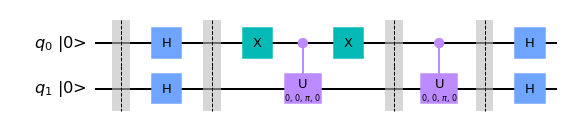

In [4]:
input = [1, -1, 1, -1]
an = BruteForceQan(2)
an.show_qubits_to_input_amplitudes_table(input)

an.append_hadamard_gates()
an.append_circuit(input)
an.append_hadamard_gates()


#an.finish_circuit()
an._circuit.draw(output='mpl', initial_state=True)

In [5]:
print("Circuit unitary:\n", run_circuit_and_get_amplitude(an._circuit))

Circuit unitary:
 [[-0.+0.j -0.-0.j  1.-0.j  0.+0.j]
 [-0.-0.j  0.+0.j -0.+0.j  1.-0.j]
 [ 1.-0.j  0.+0.j -0.+0.j -0.+0.j]
 [-0.+0.j  1.-0.j -0.-0.j  0.+0.j]]


  q0    q1    ampl
----  ----  ------
   0     0     0.5
   0     1    -0.5
   1     0     0.5
   1     1    -0.5


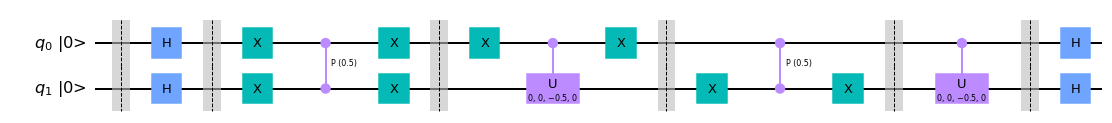

In [6]:
input = [0.5, -0.5, 0.5, -0.5]
an = PhaseShiftBruteForceQan(2)

an.show_qubits_to_input_amplitudes_table(input)

an.append_hadamard_gates()
an.append_circuit(input)
an.append_hadamard_gates()

#an.finish_circuit()
an._circuit.draw(output='mpl', initial_state=True)

In [7]:
print("Circuit unitary:\n", run_circuit_and_get_amplitude(an._circuit))

Circuit unitary:
 [[ 0.87758-0.j       0.     +0.j       0.     +0.47943j -0.     +0.j     ]
 [ 0.     +0.j       0.87758-0.j      -0.     -0.j       0.     +0.47943j]
 [ 0.     +0.47943j  0.     +0.j       0.87758-0.j      -0.     +0.j     ]
 [-0.     +0.j       0.     +0.47943j  0.     +0.j       0.87758-0.j     ]]


  q0    q1    ampl
----  ----  ------
   0     0       1
   0     1      -1
   1     0       1
   1     1      -1


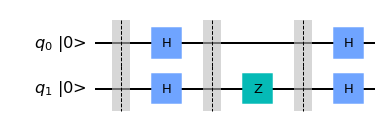

In [8]:
input = [1, -1, 1, -1]
an = HSGSQan(2)

an.show_qubits_to_input_amplitudes_table(input)

an.append_hadamard_gates()
an.append_circuit(input)
an.append_hadamard_gates()

#an.finish_circuit()
an._circuit.draw(output='mpl', initial_state=True)

In [9]:
print("Circuit unitary:\n", run_circuit_and_get_amplitude(an._circuit))

Circuit unitary:
 [[-0.+0.j -0.-0.j  1.-0.j -0.+0.j]
 [-0.-0.j -0.+0.j -0.+0.j  1.-0.j]
 [ 1.-0.j -0.+0.j -0.+0.j -0.-0.j]
 [-0.+0.j  1.-0.j -0.-0.j -0.+0.j]]


  q0    q1    ampl
----  ----  ------
   0     0      -1
   0     1      -1
   1     0       1
   1     1       1


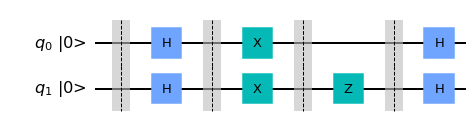

In [10]:
input = [-1, -1, 1, 1]
an = HSGSQan(2)

an.show_qubits_to_input_amplitudes_table(input)

an.append_hadamard_gates()
an.append_circuit(input)
an.append_hadamard_gates()

#an.finish_circuit()
an._circuit.draw(output='mpl', initial_state=True)

In [11]:
print("Circuit unitary:\n", run_circuit_and_get_amplitude(an._circuit))

Circuit unitary:
 [[-0.+0.j  0.+0.j -1.+0.j -0.+0.j]
 [-0.-0.j  0.-0.j  0.-0.j  1.-0.j]
 [ 1.-0.j  0.-0.j  0.-0.j -0.-0.j]
 [-0.+0.j -1.+0.j  0.+0.j -0.+0.j]]


In [12]:
#simulator = Aer.get_backend('qasm_simulator')
#result = execute(an._circuit, backend = simulator).result()
#plot_histogram(result.get_counts(an._circuit))

In [13]:
# Construct quantum circuit without measure
circ = QuantumCircuit(2)
circ.h(0)
circ.cx(0, 1)
circ.save_unitary()

# Transpile for simulator
simulator = Aer.get_backend('aer_simulator')
circ = transpile(circ, simulator)

# Run and get unitary
result = simulator.run(circ).result()
unitary = result.get_unitary(circ)
print("Circuit unitary:\n", unitary.round(5))

Circuit unitary:
 [[ 0.70711+0.j  0.70711-0.j  0.     +0.j  0.     +0.j]
 [ 0.     +0.j  0.     +0.j  0.70711+0.j -0.70711+0.j]
 [ 0.     +0.j  0.     +0.j  0.70711+0.j  0.70711-0.j]
 [ 0.70711+0.j -0.70711+0.j  0.     +0.j  0.     +0.j]]
